EDA Project on AWP

In [1]:
''' 
step 1: importing library 
step 2: load the csv file in database and create log 
step 3: check the values and columns 
step 4: fill the values in null column 
step 5: 

'''
#import the library

import numpy as np 
import pandas as pd 
# import data visualization library
import matplotlib.pyplot as plt 
import seaborn as sns 

# import filter warning library ,,after pop up 
import warnings 
warnings.filterwarnings('ignore')
# import logging 
'''step 2: load the csv file in database and create log '''

import logging
logging.basicConfig(level = logging.INFO ,
                   filename= 'model.log',
                   filemode = 'w',
                   format= '%(asctime)s - %(levelname)s - %(message)s',
                    force= True )

In [2]:
# load the dataset
df = pd.read_csv('train.csv')
df 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# shuffle fraction of the dataset : frac = 1 ensures 100% shuffle
# shuffle the  big data and when is shuffling the data with 0.1% ..create short data  
# lesser the column get good accuracy ..independent column * 20 
# i.e 80 column *20=1600 and rows 1460 available
''' step 3: reduce the dataset and shuffle the data with use fraction '''
df.sample(frac = 1) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
865,866,20,RL,NaN,8750,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,148500
1056,1057,120,RL,43.0,7052,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,185850
703,704,190,RM,76.0,7630,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,140000
404,405,60,RL,NaN,10364,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,168000
409,410,60,FV,85.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,New,Partial,339750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,631,70,RM,50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Abnorml,124000
211,212,20,RL,83.0,10420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,186000
1365,1366,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
873,874,40,RL,60.0,12144,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,0,9,2009,WD,Normal,133000


In [4]:
# show all rows and column count
df.shape

(1460, 81)

In [5]:
''' 
1. the minimum number of rows required for dataset = 20 * no.of independent column (available colmns)
2. We have 81 columns including target + Independent columns
3. Target Column : SalesPrice 
4. Rule :- As the minimum number of rows 1600 > compared with dataset rows (1460).
    hence , we have to reduce the number of columns using data preprocessing & cleaning

'''

' \n1. the minimum number of rows required for dataset = 20 * no.of independent column (available colmns)\n2. We have 81 columns including target + Independent columns\n3. Target Column : SalesPrice \n4. Rule :- As the minimum number of rows 1600 > compared with dataset rows (1460).\n    hence , we have to reduce the number of columns using data preprocessing & cleaning\n\n'

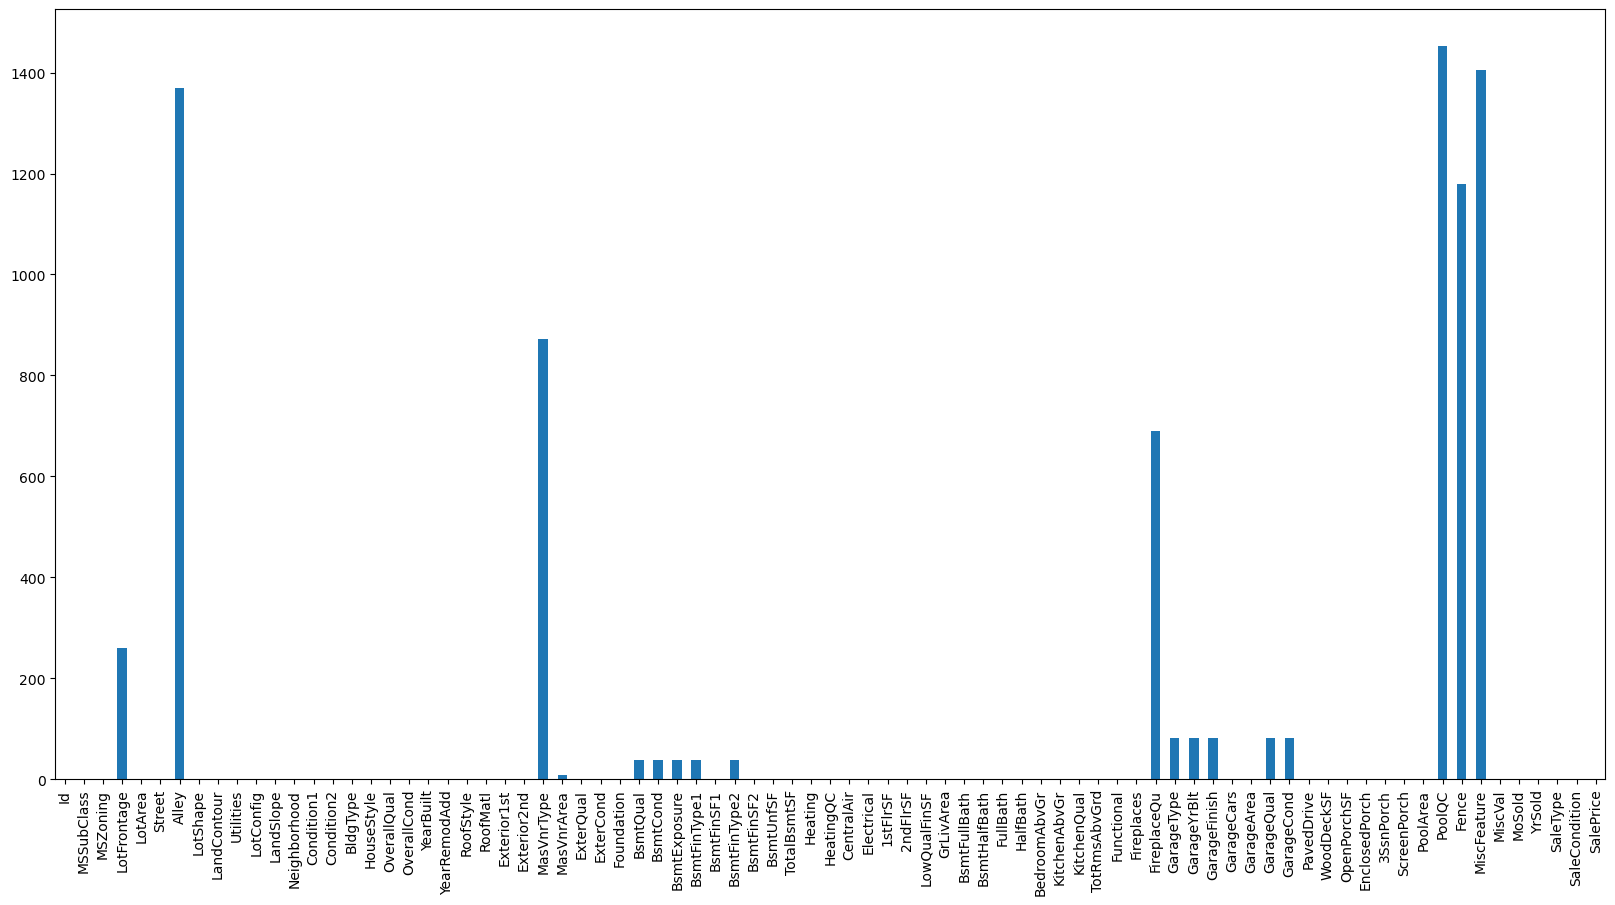

In [6]:
#import matplotlib for data visualization 
''' step 4 checking null values (fig size for bar size )''' 

plt.figure(figsize=(20,10))
df.isnull().sum().plot(kind='bar')
plt.show()

In [7]:
# segregate numerical colmn and categorical colm
'''step 5 : segregate numerical and categorical '''
categorical_col = df.select_dtypes(include= 'object')
numerical_col = df.select_dtypes(exclude= 'object') #only numerical show


categorical_col
numerical_col

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [8]:
# for numerical null values fill to values

from sklearn.impute import SimpleImputer
si= SimpleImputer(strategy= 'median')
for i in numerical_col.columns:
    df[i] = si.fit_transform(df[[i]])
numerical_col

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [9]:
sc = SimpleImputer(strategy= 'most_frequent')

for i in categorical_col.columns:
    df[i] = sc.fit_transform(df[[i]]).ravel()
    # ravel is use for 2D to convert 1D like flatten
    

In [10]:
numerical_col.isnull().sum()/ len(df)*100
categorical_col.isnull().sum()
numerical_col
categorical_col

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
# load the dataset
import pandas as pd

categorical_col = df.select_dtypes(include= 'object')
numerical_col = df.select_dtypes(exclude= 'object') #only numerical show


categorical_col


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [12]:
# Data Cleaning 
'''must imp -- data is 15 % high null values to remove this columns '''
missing_data = df.isnull().sum()/ len(df) * 100 # 1st check missing values
pd.set_option('display.max_columns',True) # show all columns including dataset 
missing_data.sort_values(ascending= False)

missing_data[missing_data > 0].sort_values(ascending= False)
# 


Series([], dtype: float64)

In [13]:
df = df.drop(columns= ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'],axis=1,inplace= True)
df

In [14]:

'''  
therefore 74 columns there
'''
numerical_col.shape,categorical_col.shape

((1460, 38), (1460, 43))

In [15]:

df.isnull().sum().plot(kind = 'bar')

AttributeError: 'NoneType' object has no attribute 'isnull'

In [ ]:
# EDA : Exploratory Data Analysis : Univariate Analysis

from collections import OrderedDict
stats=[]
for i in df.columns:
    numerical_stats = OrderedDict({
        'feature':i,
        'Count':df[i].count(),
       
        'Median' :df[i].median(),
        'Minimum': df[i].min(),
        'Maximum' : df[i].max(),
        'Range' : df[i].max()- df[i].min(),
        'Q1' : df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR' : df[i].quantile(0.75)-df[i].quantile(0.25)
        


    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report['IQR'].value_counts(ascending=False)

TypeError: Cannot convert ['RL' 'RL' 'RL' ... 'RL' 'RL' 'RL'] to numeric

In [ ]:
import pandas as pd
import seaborn as sns  # Titanic dataset is available in seaborn

# Load Titanic dataset
df = sns.load_dataset('train')

# Now check the target column imbalance
print(df['SalesPrice'].value_counts())

In [ ]:
# find out the columns where IQR == 0 & DROP the columns 
report[report ['IQR'] == 0]['Feature'].values


In [ ]:
# drop columns where iqr == 0 
df.drop(columns=[],axis=1)

In [ ]:
# categorical columns show using labelencoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col:
    df[i] = le.fit_transform(df[i])

df
# upto label encoder drop columns data cleaning 